In [21]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# read in all the data make a bar plot for each road
exeter_city = pd.read_csv("../data/Exeter_city_only.csv", header = 0)

In [57]:
# select a year and make a barplot with the distribution of vehicles for each road.
exeter_year = exeter_city[exeter_city["AADFYear"] == 2014]

print(list(exeter_year))

['AADFYear', 'CP', 'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting', 'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km', 'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV', 'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV', 'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles']


In [18]:
# modes that we are interested in
mode = ['PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 
        'AllHGVs', 'AllMotorVehicles']

CP = exeter_city["CP"].tolist()

In [28]:
# make a dataframe of just the columns we want to stack
exeter_year = exeter_year[["CP","PedalCycles","Motorcycles","CarsTaxis","BusesCoaches","LightGoodsVehicles",
                           "AllHGVs"]]
exeter_year.set_index(exeter_year["CP"], inplace = True, drop = True)

exeter_year.drop('CP', axis=1, inplace=True)

print(exeter_year[0:10])

       PedalCycles  Motorcycles  CarsTaxis  BusesCoaches  LightGoodsVehicles  \
CP                                                                             
6407           744          576      24513           279                5805   
16023            0          148      56860           225               13695   
16382           32          298      12700           124                2572   
16971           95          181       9791           176                1910   
16972          139          292      18409           125                3467   
18081           11          134      18578            86                4259   
26410           38          293      26278           136                4414   
37674           68          294      31372           352                5690   
37882            2          237      29727           141                6542   
47077          159          177      11076           379                1810   

       AllHGVs  
CP              
6407 

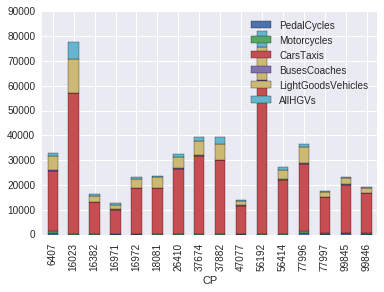

In [30]:
exeter_year.plot.bar(stacked = True)

In [59]:
# Do the same but name by road
exeter_year = exeter_year[["Road","PedalCycles","Motorcycles","CarsTaxis","BusesCoaches","LightGoodsVehicles",
                           "AllHGVs"]]
exeter_year.set_index(exeter_year["Road"], inplace = True, drop = True)

exeter_year.drop('Road', axis=1, inplace=True)


KeyError: "['Road'] not in index"

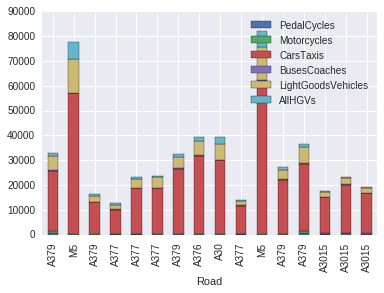

In [62]:
exeter_year.plot.bar(stacked = True)

fig = plt.gcf()

fig.savefig('../plots/barplots/test_barplot.pdf')

In [36]:
# seperate out into outer and inner

# Perhaps we just want to focus on the smaller roads in Exeter. Lets drop rows with M5 or 

exeter_outer = exeter_year[(exeter_year.index == "M5") | (exeter_year.index == "A30")]
exeter_inner = exeter_year[(exeter_year.index != "M5") & (exeter_year.index != "A30")]


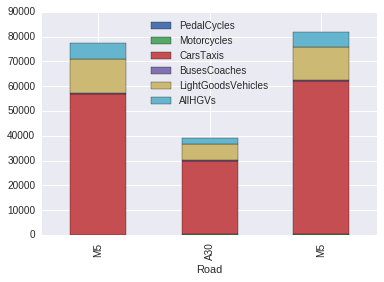

In [37]:
exeter_outer.plot.bar(stacked = True)

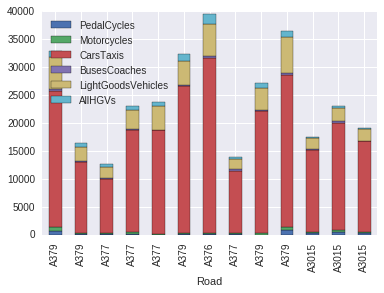

In [38]:
exeter_inner.plot.bar(stacked = True)

In [42]:
# groupby road and make these plots again?
group = exeter_inner.groupby(exeter_inner.index).sum()

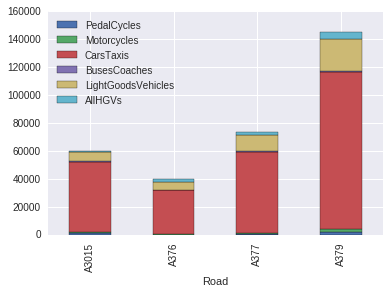

In [43]:
group.plot.bar(stacked = True)

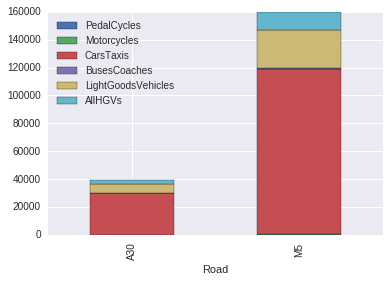

In [46]:
# groupby road and make these plots again?
group = exeter_outer.groupby(exeter_outer.index).sum()

group.plot.bar(stacked = True)

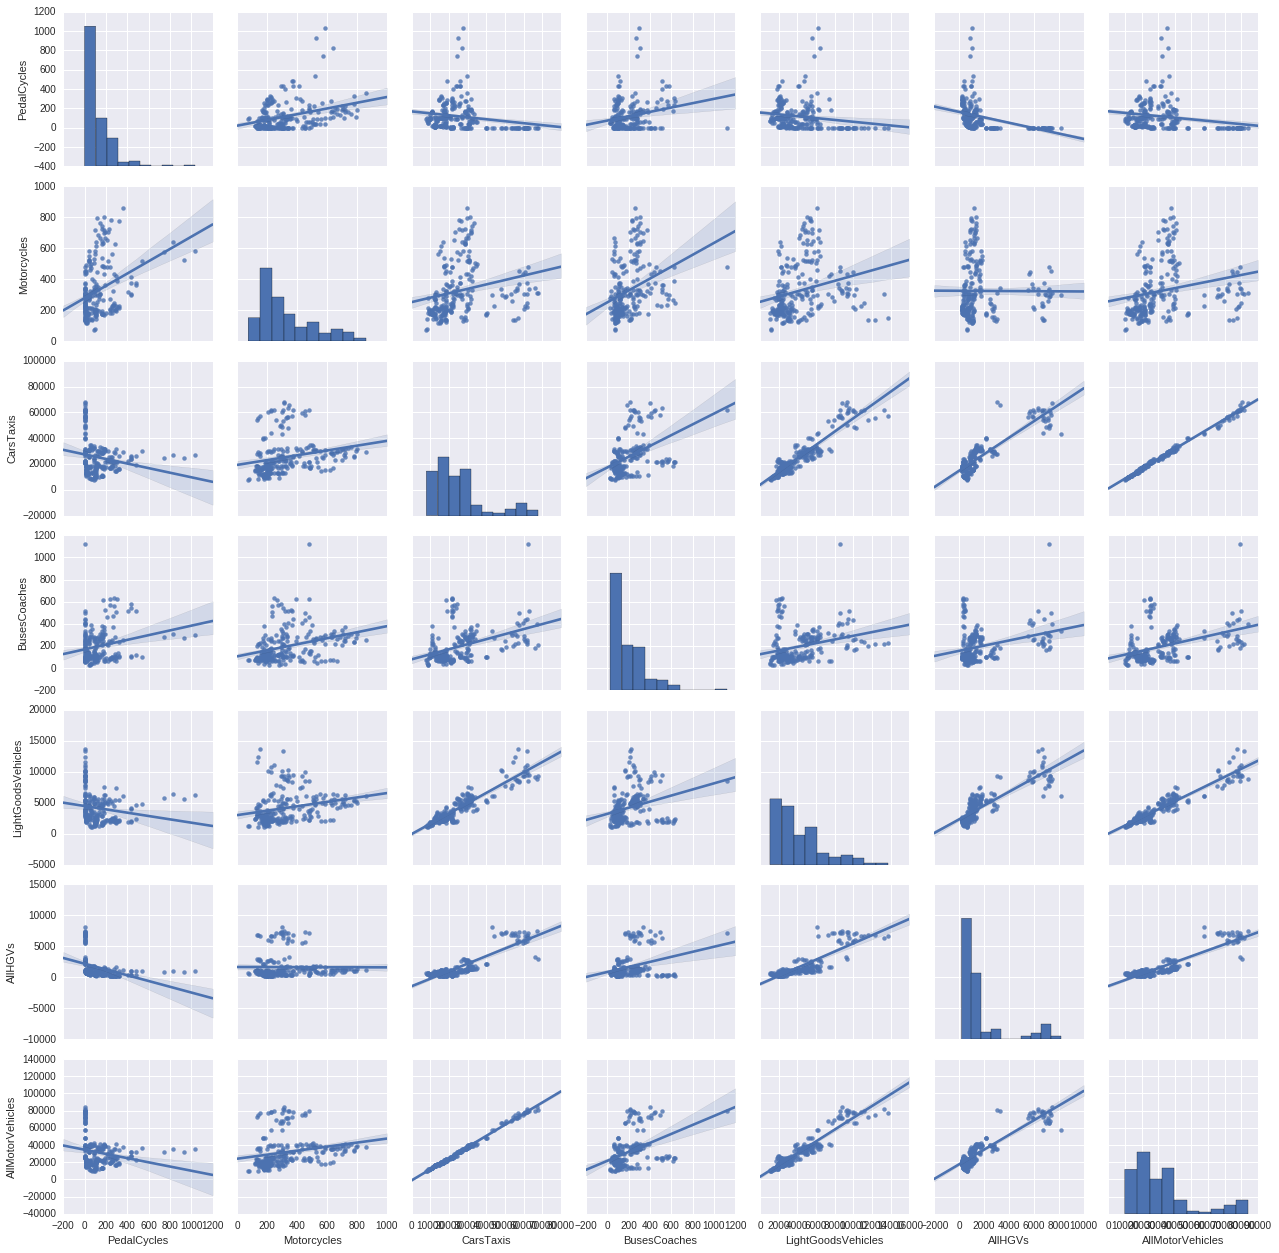

In [54]:
ax = sns.pairplot(exeter_city[['PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 
        'AllHGVs', 'AllMotorVehicles']],kind = "reg")

ax.savefig('../plots/scattermatrix_all.pdf')